# Regressão Linear - Previsão de Aluguel de Imóveis

O objetivo deste projeto é desenvolver um modelo de **regressão linear múltipla** para prever o valor do aluguel de imóveis residenciais.

A previsão será feita com base em características estruturais dos imóveis, como:
- Metragem
- Número de quartos
- Banheiros
- Suítes
- Vagas de garagem
- Valor do condomínio

O desempenho do modelo deve ser avaliado principalmente pelo **coeficiente de determinação (R²)**.  
Essa métrica mostra a proporção da variação no valor do aluguel que pode ser explicada pelas variáveis do modelo.

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Importação dos dados
df = pd.read_csv("/content/imoveis_aluguel.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


## Dicionário de Variáveis

| Variável           | Descrição                                                                 |
|--------------------|---------------------------------------------------------------------------|
| **Valor_Aluguel**   | Valor total pago mensalmente pelo aluguel do imóvel, em reais.       |
| **Valor_Condominio**| Valor mensal da taxa de condomínio do imóvel, em reais.              |
| **Metragem**        | Área total do imóvel em metros quadrados (m²).                            |
| **N_Quartos**       | Quantidade total de quartos no imóvel (incluindo suítes).                 |
| **N_banheiros**     | Número total de banheiros no imóvel (incluindo os localizados em suítes).|
| **N_Suites**        | Número de suítes do imóvel. Suíte é um quarto com banheiro privativo.     |
| **N_Vagas**         | Quantidade de vagas disponíveis na garagem do imóvel.                    |


## Pré Processamento e Análise Exploratória dos Dados

Foram realizadas as seguintes etapas para preparar os dados para a modelagem e obter insights iniciais:

- **Análise de Outliers**  
  Identificação de valores extremos que podem distorcer as análises ou modelos.

- **Transformação de dados**  
  Aplicação de transformações logarítmicas.

- **Análise exploratória univariada e bivariada**  
  Exploração gráfica e estatística das variáveis para entender a distribuição e possíveis relacionamentos.

- **Análise de correlação**  
  Avaliação da correlação entre variáveis numéricas para detectar associações relevantes.

- **Separação em base treino e teste**  
  Divisão do conjunto de dados em dados de treinamento e teste para validação dos modelos preditivos.

In [3]:
# Informações básicas do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


In [4]:
# Verificação de dados nulos
df.isnull().sum().any()

np.False_

O DataFrame não possui dados nulos e todas as variáveis são números inteiros.

In [5]:
# Estatística descritiva
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


É possível observar que as variáveis Valor_Aluguel,	Valor_Condominio e Metragem possuem uma diferença considerável entre média e mediana, além de elevado desvio padrão. Percebe-se também que os valores máximos estão muito distantes da mediana. Dessa forma, precisamos avaliar possíveis outliers.

### Outliers

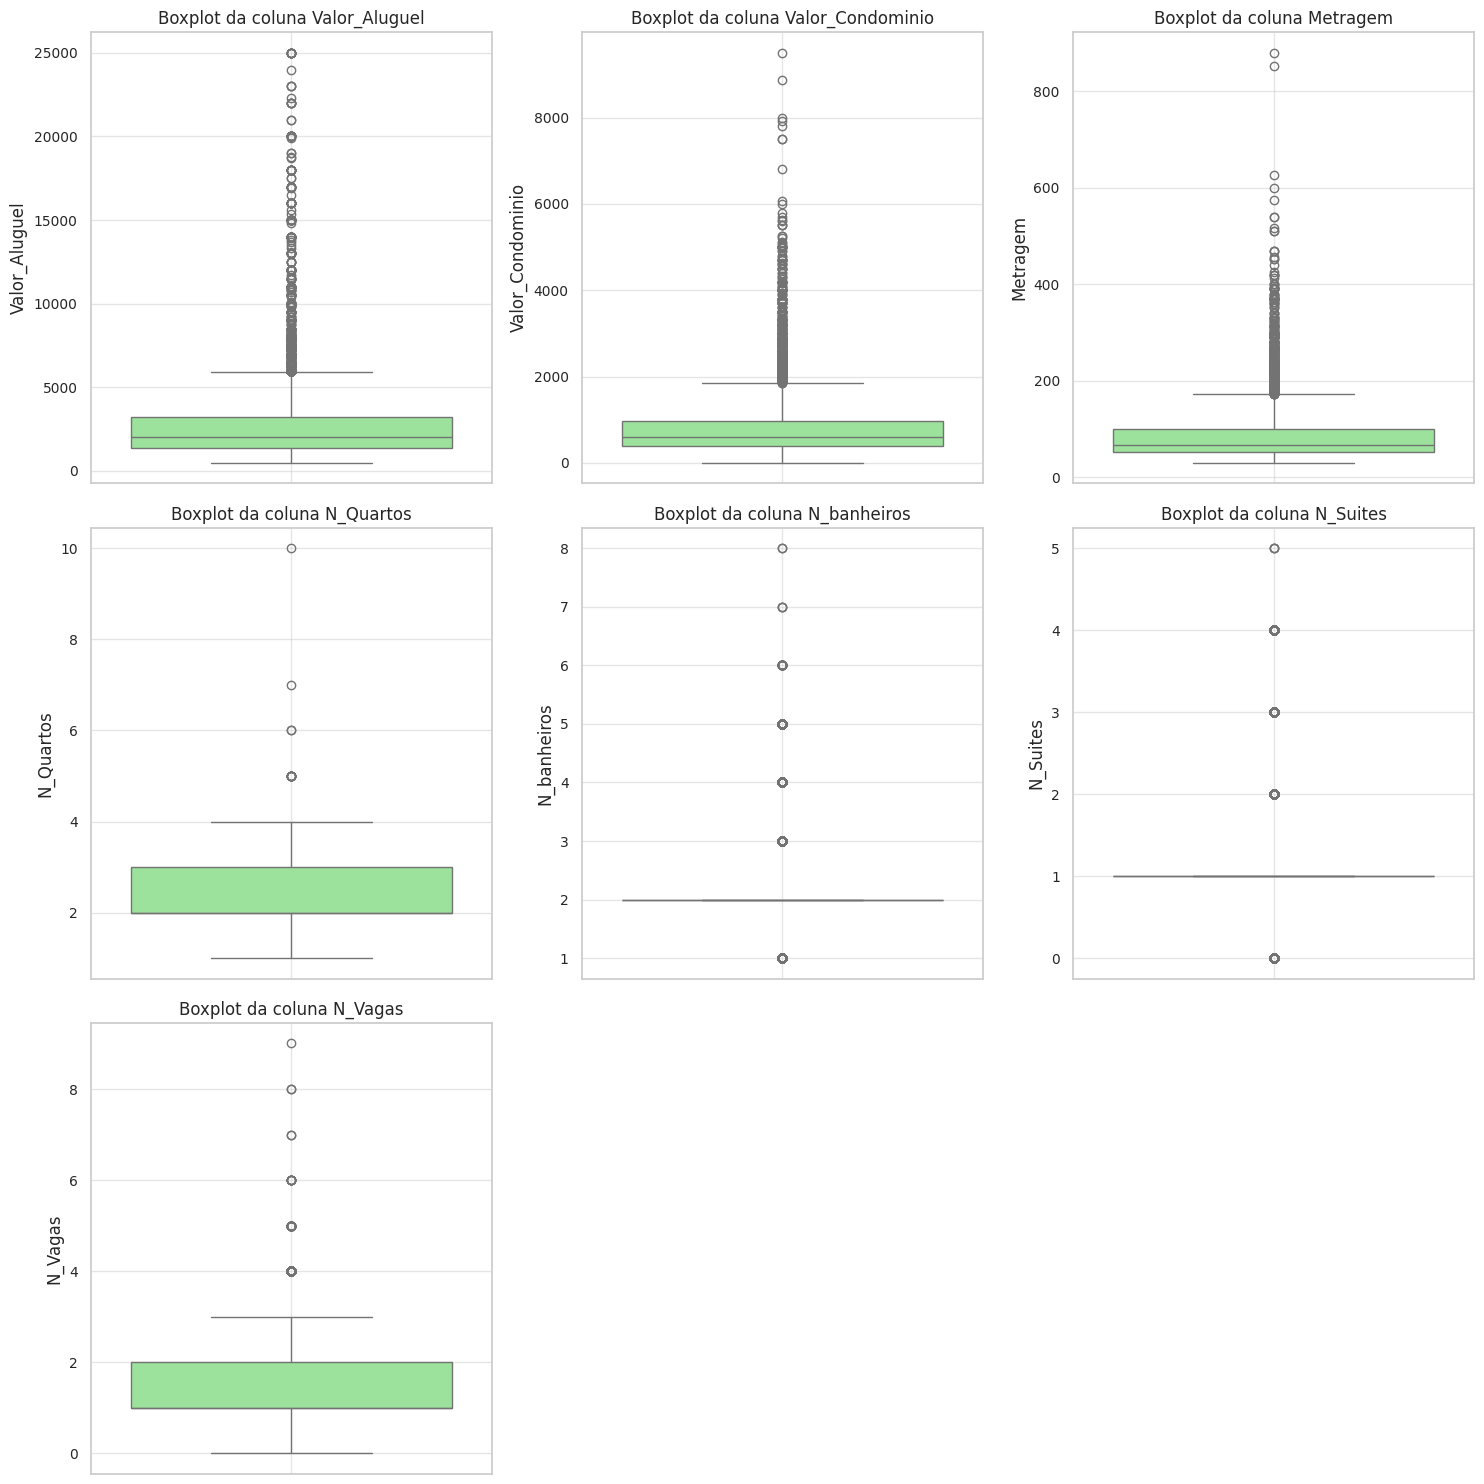

In [6]:
# Boxplot
colunas = ['Valor_Aluguel', 'Valor_Condominio', 'Metragem',
           'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']

sns.set(style="whitegrid")
n_linhas = (len(colunas) + 2) // 3  # Até 3 gráficos por linha
plt.figure(figsize=(15, 5 * n_linhas))

# Criando subplots
for i, col in enumerate(colunas):
    plt.subplot(n_linhas, 3, i + 1)  # (linhas, colunas, posição)
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f'Boxplot da coluna {col}')
    plt.yticks(fontsize=10)
    plt.ylabel(col)
    plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

É possível observar que todas as variáveis apresentam outliers.
- Valor_Aluguel, Valor_Condominio e Metragem possuem valores extremos que precisam ser tratados.
- N_Quartos, N_banheiros, N_Suites e N_Vagas possuem poucas categorias distintas, portanto não vamos mexes nessas variáveis.

In [7]:
# Função para remover outliers
def remover_outliers(df, coluna):
    # Cálculo dos quartis e IQR
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    # Limites inferior e superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # df sem outliers
    return df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

Em um primeiro teste, foi realizada a remoção de outliers utilizando o IQR (conforme função acima). Porém, essa alteração resultou em uma diminuição considerável na correlação da variável alvo (Valor_Aluguel) com as demais. A regressão linear também foi afetada, resultando em um coeficiente de determinação (R²) muito baixo quando comparado ao modelo que continha os outliers.

Ou seja, a remoção dos outliers reduziu a correlação com o valor do aluguel, mostrando que os valores extremos possuem informação relevante para o modelo.

Desse modo, optou-se pela transformação logarítmica. Com isso, perde-se correlação com a variável Valor_Condominio, mas o valor do R² é mantido.

In [8]:
# Transformação logarítmica
df['Valor_Aluguel_log'] = np.log1p(df['Valor_Aluguel'])
df['Valor_Condominio_log'] = np.log1p(df['Valor_Condominio'])
df['Metragem_log'] = np.log1p(df['Metragem'])

### Análise Bivariada

Para facilitar a análise visual, vamos utilizar os dados originais, e não os transformados.

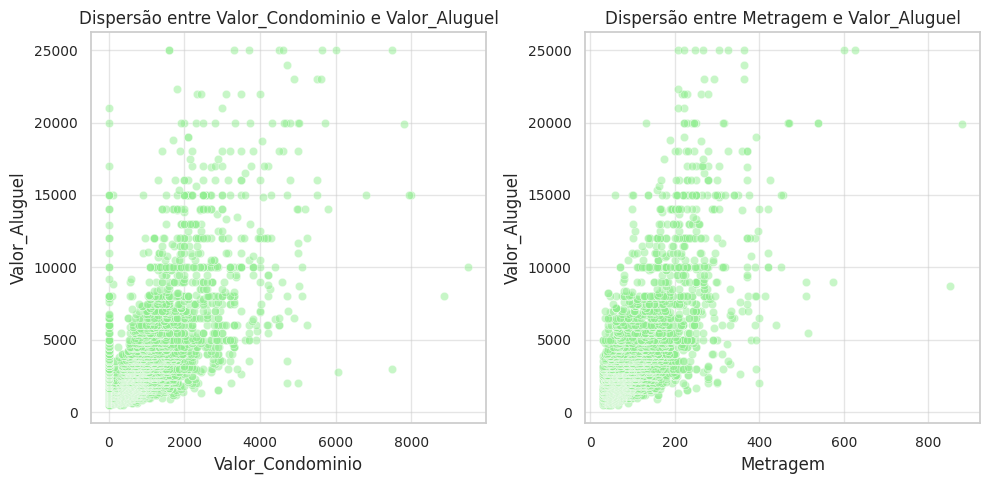

In [9]:
# Gráfico de dispersão
colunas = ['Valor_Condominio', 'Metragem']

sns.set(style="whitegrid")
n_linhas = (len(colunas) + 2) // 3  # Até 3 gráficos por linha
plt.figure(figsize=(15, 5 * n_linhas))

# Criando subplots
for i, col in enumerate(colunas):
    plt.subplot(n_linhas, 3, i + 1)  # (linhas, colunas, posição)
    sns.scatterplot(data=df, x=col, y='Valor_Aluguel', color='lightgreen', alpha=0.5)
    plt.title(f'Dispersão entre {col} e Valor_Aluguel')
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Valor_Aluguel')
    plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

Observando o gráfico entre Valor_Condominio e Valor_Aluguel, é possível perceber que imóveis com diferentes faixas de aluguel não possuem cobrança de condomínio. Isso pode estar relacionado a imóveis que não estejam localizados dentro de condomínios.

De forma geral, quanto maior a metragem e o valor do condomínio, maior o valor do aluguel.

Porém, como o DataFrame possui dados extremos, observamos diversos pontos que não se enquadram nessa análise. Isso pode estar relacionado a outros aspectos do imóvel e do condomínio que não estão sendo considerados aqui, como estrutura condominal, se o imóvel é mobiliado ou não, etc.

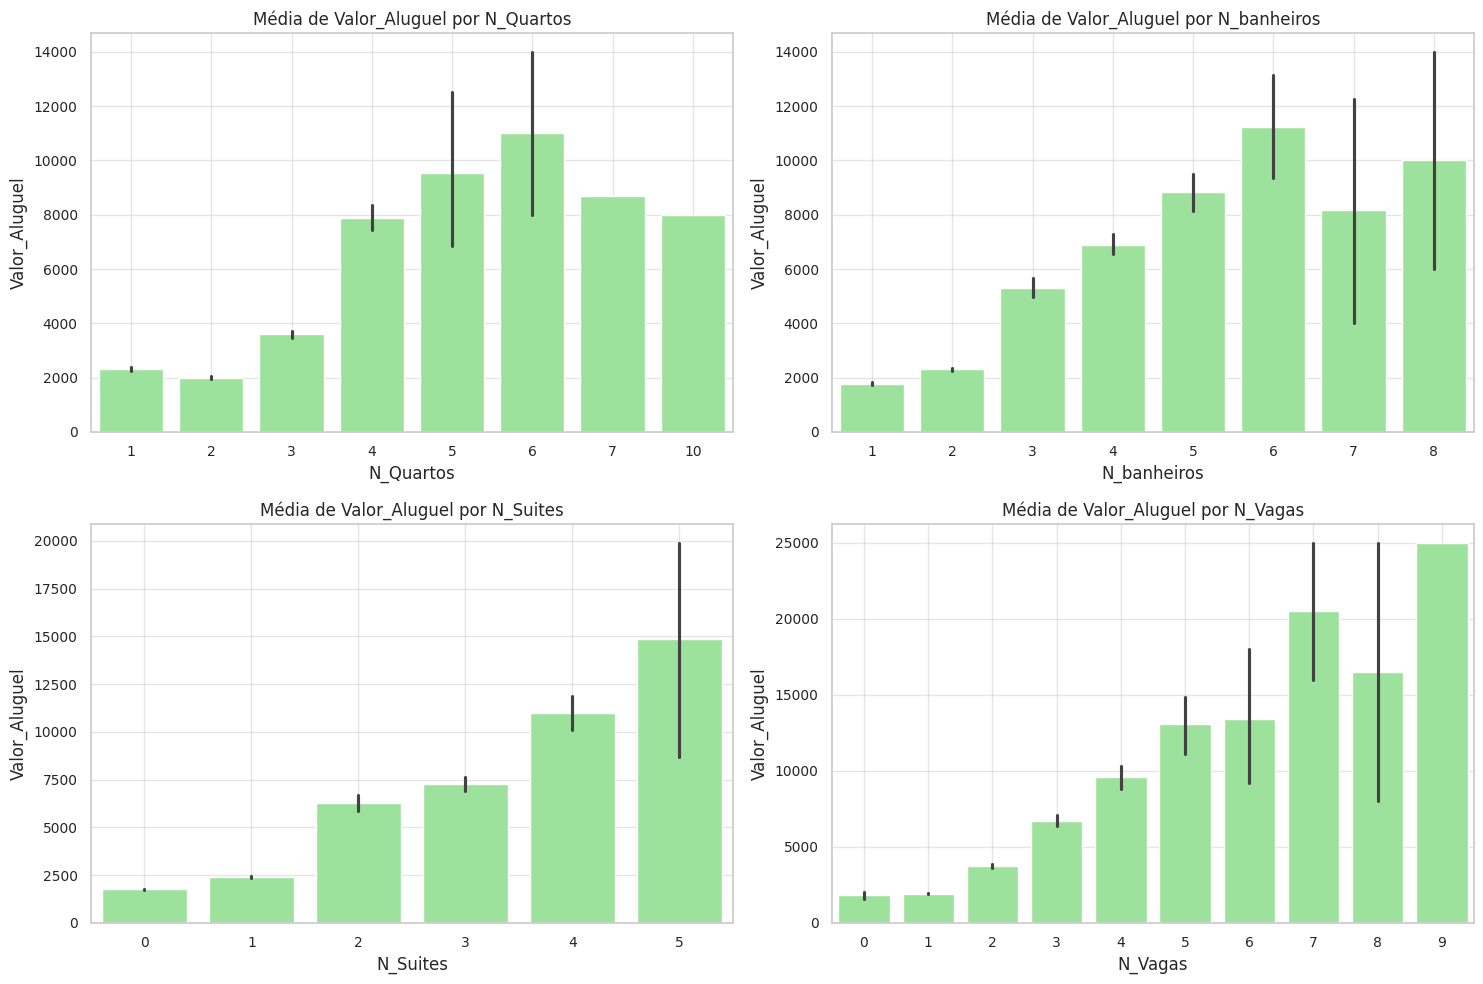

In [10]:
# Gráfico de barras
colunas = ['N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']

sns.set(style="whitegrid")
n_linhas = (len(colunas) + 1) // 2  # Até 2 gráficos por linha
plt.figure(figsize=(15, 5 * n_linhas))

# Criando subplots
for i, col in enumerate(colunas):
    plt.subplot(n_linhas, 2, i + 1)  # (linhas, colunas, posição)
    sns.barplot(data=df, x=col, y='Valor_Aluguel', color='lightgreen')
    plt.title(f'Média de Valor_Aluguel por {col}')
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Valor_Aluguel')
    plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

Os valores de aluguel mais baixos, até R$ 2000, estão associados a imóveis com menos cômodos/vagas.

De forma geral e principalmente para as categorias baixa/médias, quanto mais cômodos e vagas o imóvel possui, maior o valor do aluguel. Esse é um comportamento esperado, mas também é possível ver o efeito dos outliers nos dados, principalmente nas categorias mais altas.

As categorias mais altas possuem grande variação. Isso pode estar relacionado a outros fatores, como localização, idade do prédio, entre outros.

### Correlação



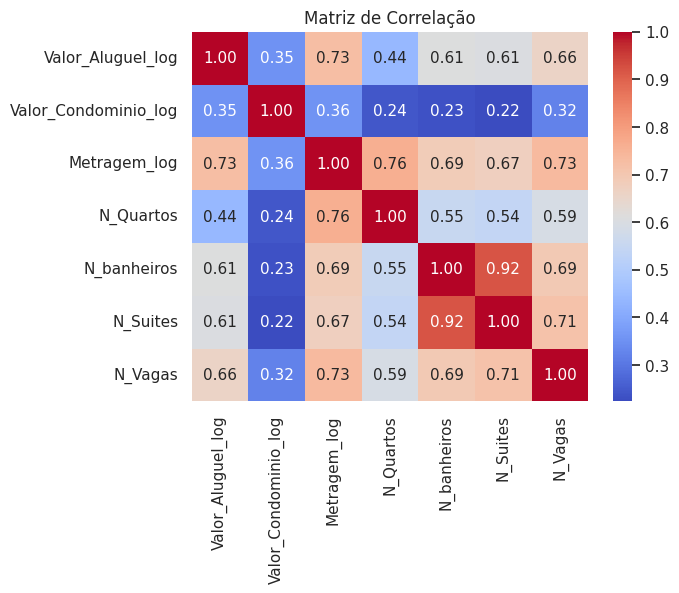

In [11]:
# Mapa de calor da matriz de correlação
corr = df[['Valor_Aluguel_log', 'Valor_Condominio_log', 'Metragem_log',
           'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 11})
plt.title('Matriz de Correlação')
plt.show()

Para a correlação foram usados somente os valores já transformados, uma vez que os originais possuem outliers.

É possível verificar que o Valor_Aluguel possui alta correlação com a Metragem (0.73). Além disso, a correlação com N_banheiros, N_Suites e N_Vagas ficou acima de 0.60.

Por outro lado, a correlação com Valor_Condominio e N_Quartos ficou abaixo de 0.5.

### Separação em Base Treino e Teste

In [12]:
# Separação dos dados em X e y
X = df.drop(['Valor_Aluguel', 'Valor_Aluguel_log', 'Valor_Condominio', 'Metragem'], axis=1)  # Variáveis independentes (características)
y = df['Valor_Aluguel_log']  # Variável dependente (rótulo)

In [13]:
# Separa os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
# Confere o tamanho dos conjuntos de dados
print('Tamanho de x_train:', X_train.shape)
print('Tamanho de y_train:', y_train.shape)
print('Tamanho de x_test:', X_test.shape)
print('Tamanho de y_test:', y_test.shape)

Tamanho de x_train: (5402, 6)
Tamanho de y_train: (5402,)
Tamanho de x_test: (1801, 6)
Tamanho de y_test: (1801,)


## Modelo de Regressão Linear Simples

In [15]:
# Seleção das variáveis
X = X_train[['Metragem_log']]
y = y_train

regressao_simples = LinearRegression()
regressao_simples.fit(X,y)

LinearRegression()

In [16]:
# Coeficiente linear
regressao_simples.intercept_

np.float64(3.570978997112859)

In [17]:
# Coeficiente angular
regressao_simples.coef_

array([0.95550065])

Nossa equação seria:

$$y = 0{.}96x + 3{.}57$$


In [18]:
# R²
regressao_simples.score(X,y)

0.5179194730075727

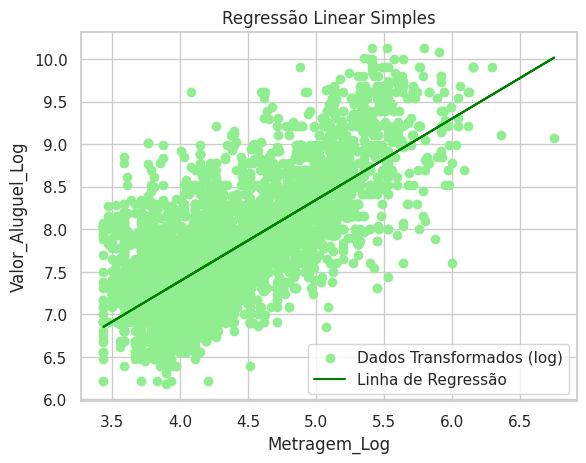

In [19]:
# Gráfico de regressão - Dados transformados (log)

# Gráfico de dispersão com os dados de treino originais
plt.scatter(X, y, color='lightgreen', label='Dados Transformados (log)')
# Reta de regressão
plt.plot(X, regressao_simples.predict(X), color='green', label='Linha de Regressão')
plt.xlabel('Metragem_Log')
plt.ylabel('Valor_Aluguel_Log')
plt.title('Regressão Linear Simples')
plt.legend()
plt.show()

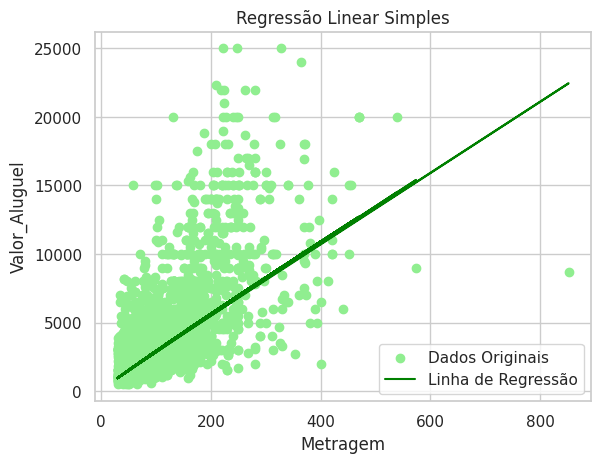

In [20]:
# Gráfico de regressão - Dados reais

# Cálculo da previsão real
previsao_real = np.expm1(regressao_simples.predict(X))

# Gráfico de dispersão com os dados de treino originais
plt.scatter(np.expm1(X), np.expm1(y), color='lightgreen', label='Dados Originais')
# Reta de regressão
plt.plot(np.expm1(X), previsao_real, color='green', label='Linha de Regressão')
plt.xlabel('Metragem')
plt.ylabel('Valor_Aluguel')
plt.title('Regressão Linear Simples')
plt.legend()
plt.show()

Apesar do valor de R² não ser muito elevado (0.52), o modelo explica pouco mais da metade da variação do aluguel. Esse não é um resultado ruim, já que estamos usando um modelo de regressão simples.

Essa limitação também pode ser observada no gráfico com os dados transformados (log), onde há uma dispersão em torno da reta. O comportamento se repete ao comparar a reta de regressão com os dados originais, sem a transformação, onde a dispersão é até maior por conta dos outliers.

In [21]:
# Aplicando o modelo na base de teste
X = X_test[['Metragem_log']]
y = y_test

In [22]:
# Avaliando o desempenho do modelo com R²
regressao_simples.score(X, y)

0.5577971344338841

Para os dados de treino, o modelo apresentou um R² de 0.56, enquanto para os dados de teste o valor foi de 0.52. Isso indica que o desempenho foi consistente entre as bases de treino e teste, sem sinais de overfitting.

Como próximo passo, uma alternativa para melhorar o modelo é utilizar mais variáveis independentes em uma regressão linear múltipla.

## Modelo de Regressão Linear Múltipla

In [23]:
# Seleção das variáveis
X = X_train
y = y_train

regressao_multipla = LinearRegression()
regressao_multipla.fit(X,y)

LinearRegression()

In [24]:
# R²
regressao_multipla.score(X,y)

0.6069490688158841

In [25]:
# Aplicando o modelo na base de teste
X = X_test
y = y_test

# R²
regressao_multipla.score(X, y)

0.6320924886503452

Pode-se observar uma pequena melhora em relação ao modelo simples, com R² de 0.61 para os dados de treino, e 0.63 para a base de testes. Novamente, não foi observado overfitting.

Também foi realizado um teste removendo as variáveis Valor_Condomínio e N_Quartos do modelo. Mas, o resultado do coeficiente de determinação foi inferior.

## Conclusões

Houve uma pequena melhora no desempenho do modelo ao utilizar a regressão linear múltipla, em relação à regressão linear simples. O R² aumentou de **0.52 no modelo simples** para **0.61 no modelo múltiplo**, indicando que o segundo foi capaz de explicar uma proporção maior da variação no valor do aluguel.

Essa melhora sugere que informações relevantes foram adicionadas no segundo modelo. Porém, como o aumento não foi tão evidente, é importante **avaliar outras métricas de desempenho além do R²** antes de tomar uma decisão final.

É válido lembrar que dependendo do objetivo da análise, o modelo mais simples poderia ser suficiente.

Como próximos passos, seria interessante incluir variáveis que podem ter impacto no valor do aluguel, como:
- Idade do imóvel;
- Localização (bairro, proximidade de centros comerciais ou transporte);
- Estrutura do condomínio (área de lazer, elevador, portaria 24h);
- Estado de conservação do imóvel.

Análises com essas variáveis podem melhorar ainda mais o modelo, resultando em uma previsão mais precisa.